In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 1: Data Exploration
# Load the dataset
t20_data = pd.read_csv("t20_world_cup_2022.csv")

In [13]:
# Remove duplicate rows
t20_data.drop_duplicates(inplace=True)

In [14]:
# Display basic information about the dataset
print(t20_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9813 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9813 non-null   int64  
 1   match_id           9813 non-null   int64  
 2   match_name         9813 non-null   object 
 3   home_team          9813 non-null   object 
 4   away_team          9813 non-null   object 
 5   current_innings    9813 non-null   object 
 6   innings_id         9813 non-null   int64  
 7   over               9813 non-null   int64  
 8   ball               9813 non-null   int64  
 9   runs               9813 non-null   int64  
 10  shortText          9813 non-null   object 
 11  isBoundary         9813 non-null   bool   
 12  isWide             9813 non-null   bool   
 13  isNoball           9813 non-null   bool   
 14  batsman1_id        9813 non-null   int64  
 15  batsman1_name      9813 non-null   object 
 16  batsman1_runs      9813 non-n

In [15]:
# Display the first few rows of the dataset
print(t20_data.head())

   comment_id  match_id match_name home_team away_team current_innings  \
0         130   1298179  ENG v PAK       PAK       ENG             PAK   
1         120   1298179  ENG v PAK       PAK       ENG             PAK   
2         110   1298179  ENG v PAK       PAK       ENG             PAK   
3         140   1298179  ENG v PAK       PAK       ENG             PAK   
4         150   1298179  ENG v PAK       PAK       ENG             PAK   

   innings_id  over  ball  runs  ... wicket_id  wkt_batsman_name  \
0           1     1     1     0  ...       NaN               NaN   
1           1     1     1     1  ...       NaN               NaN   
2           1     1     1     1  ...       NaN               NaN   
3           1     1     2     2  ...       NaN               NaN   
4           1     1     3     0  ...       NaN               NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls wkt_text  \
0              NaN               NaN                NaN      NaN   
1         

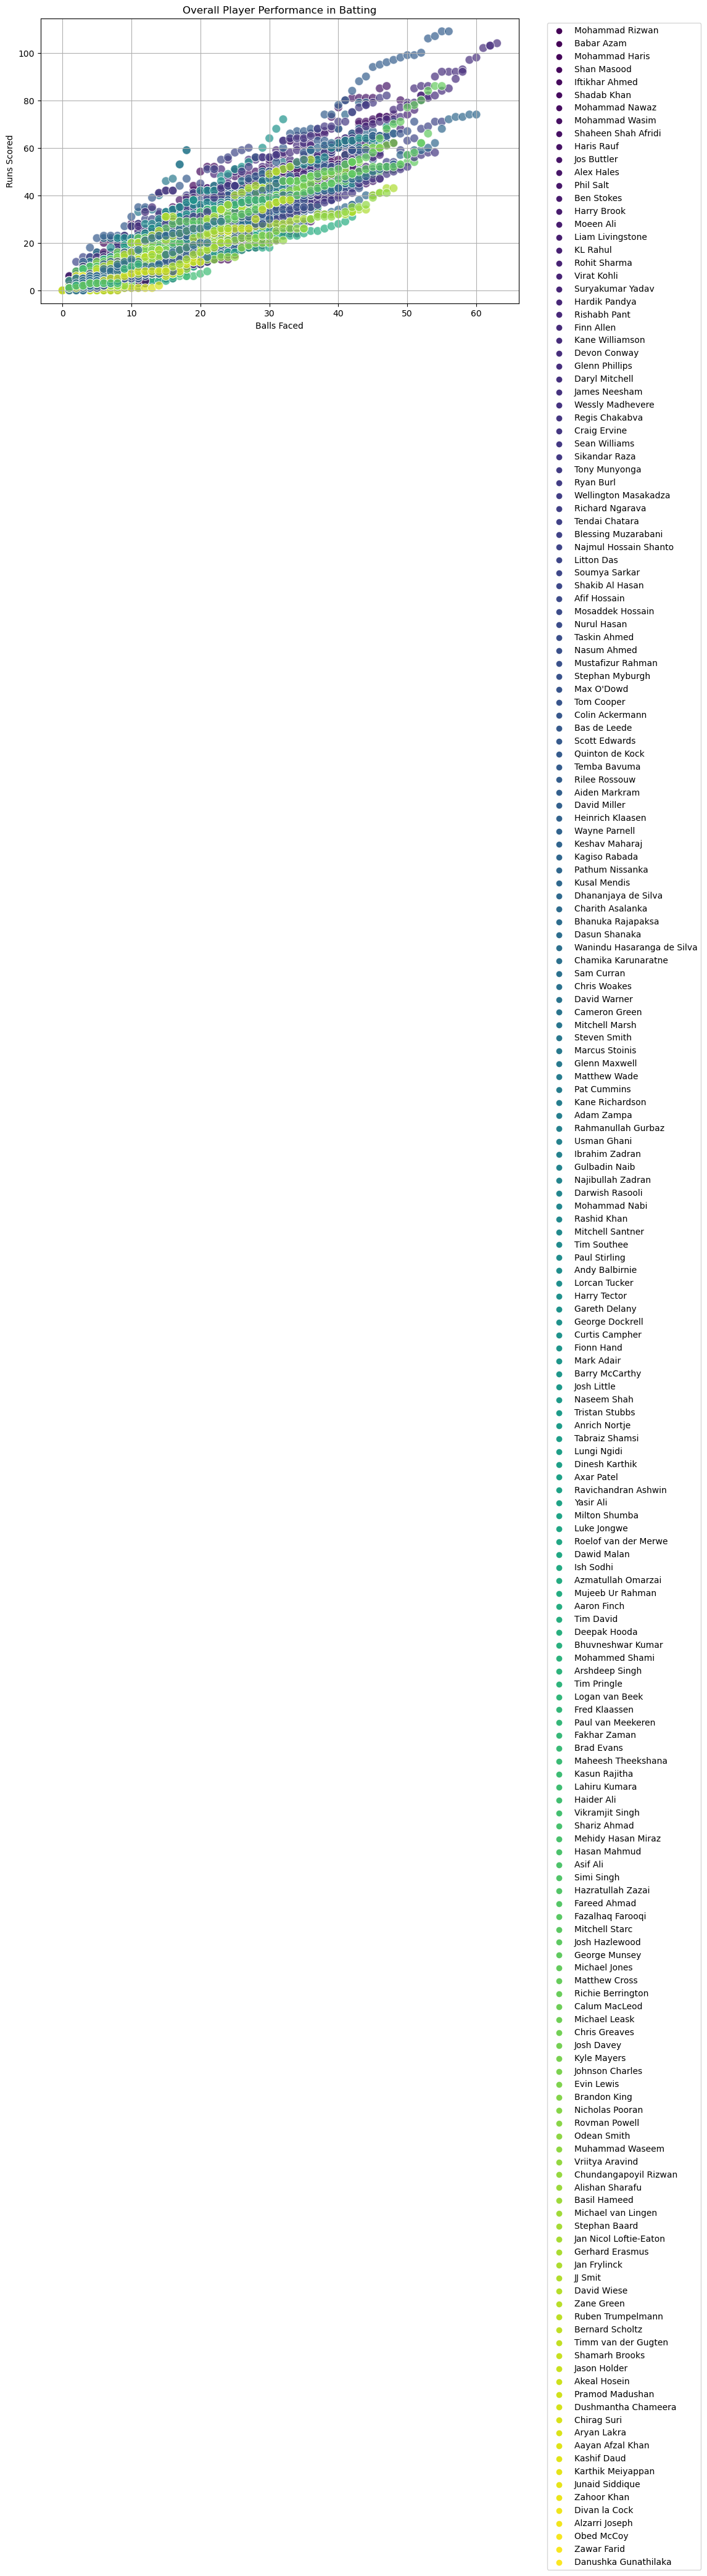

In [10]:
# Overall player performance in batting (Runs vs. Balls Faced)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='batsman1_balls', y='batsman1_runs', data=t20_data, hue='batsman1_name', palette='viridis', s=100, alpha=0.7)
plt.title('Overall Player Performance in Batting')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

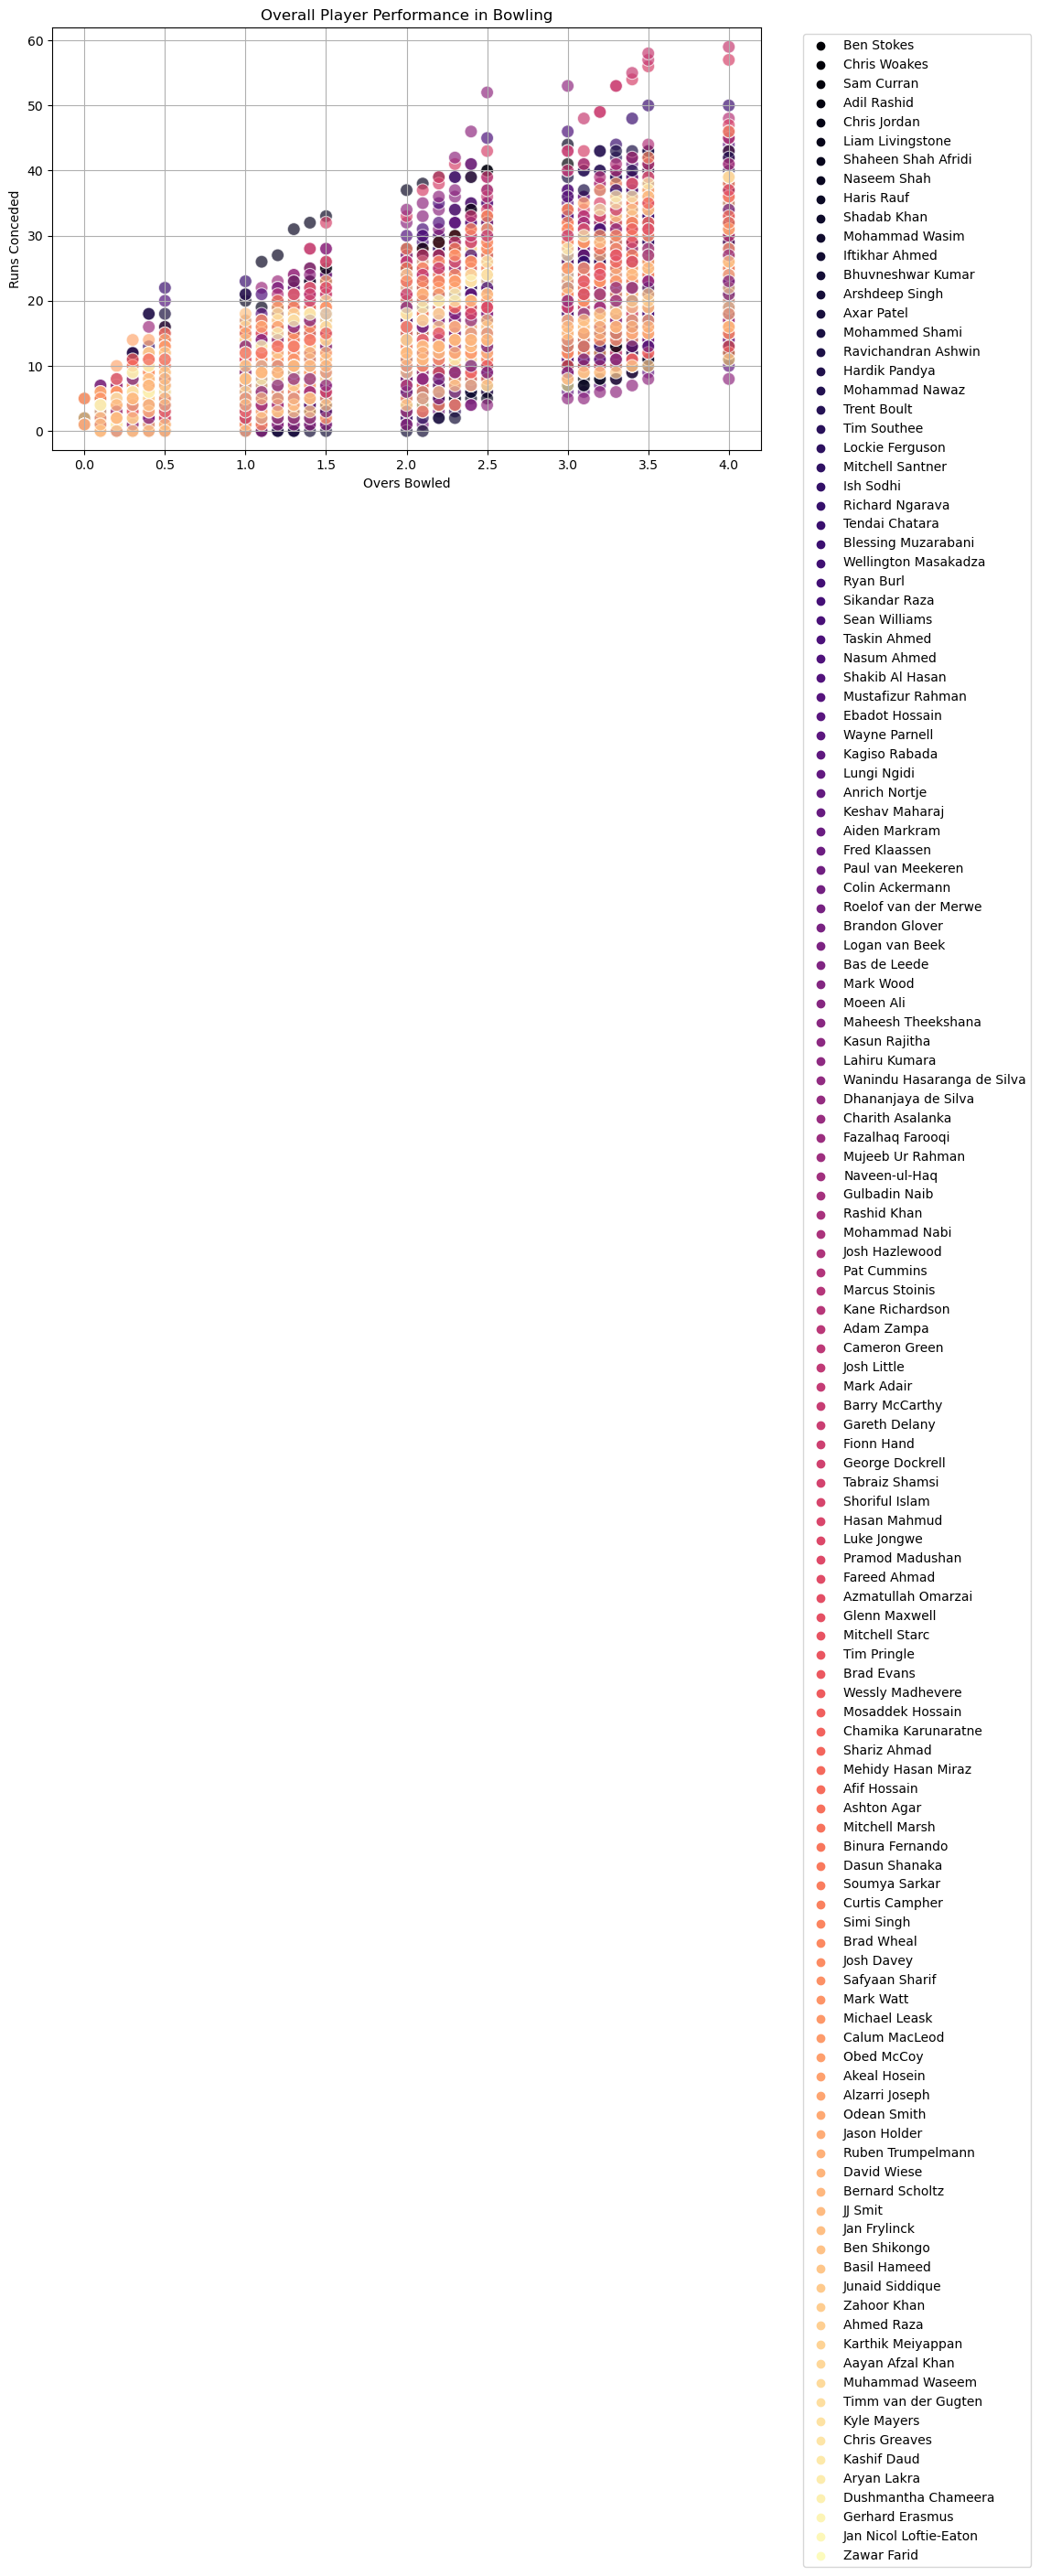

In [16]:
# Overall player performance in bowling (Runs Conceded vs. Overs Bowled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bowler1_overs', y='bowler1_runs', data=t20_data, hue='bowler1_name', palette='magma', s=100, alpha=0.7)
plt.title('Overall Player Performance in Bowling')
plt.xlabel('Overs Bowled')
plt.ylabel('Runs Conceded')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of Ball Types')

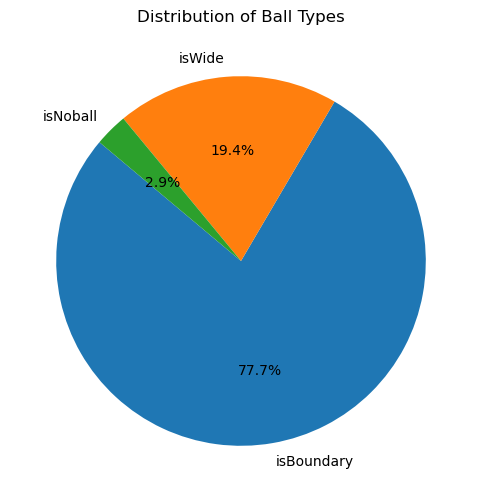

In [17]:
# Pie chart of boundary, wide-ball, and no-ball
ball_types = ['isBoundary', 'isWide', 'isNoball']
ball_counts = [t20_data[ball_type].sum() for ball_type in ball_types]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(ball_counts, labels=ball_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ball Types')

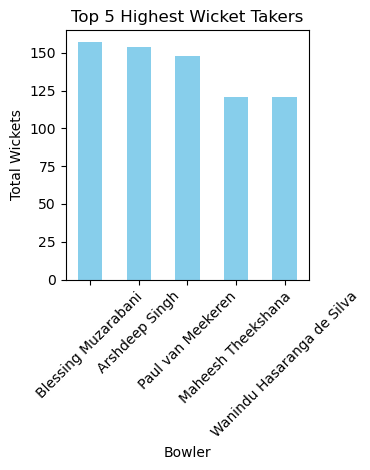

In [18]:
highest_wicket_takers = t20_data.groupby('bowler1_name')['bowler1_wkts'].sum().nlargest(5)

plt.subplot(1, 2, 2)
highest_wicket_takers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Highest Wicket Takers')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Virat Kohli'),
  Text(1, 0, 'Pathum Nissanka'),
  Text(2, 0, "Max O'Dowd"),
  Text(3, 0, 'Glenn Phillips'),
  Text(4, 0, 'Jos Buttler')])

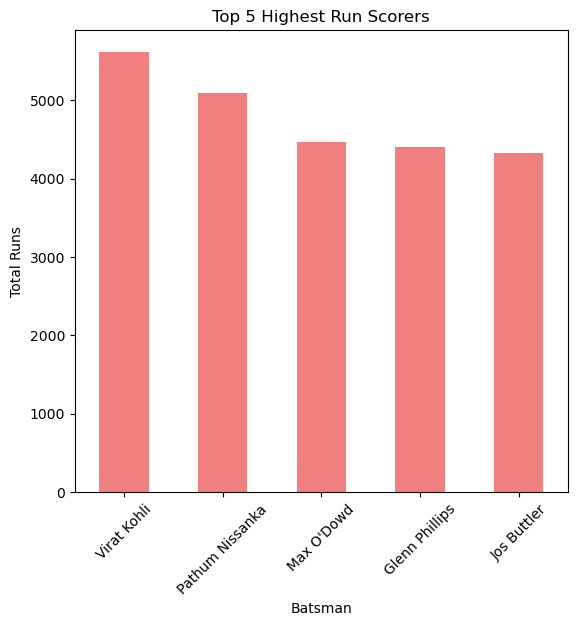

In [19]:
# Bar chart for highest run-scorer
highest_run_scorers = t20_data.groupby('batsman1_name')['batsman1_runs'].sum().nlargest(5)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
highest_run_scorers.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Highest Run Scorers')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)

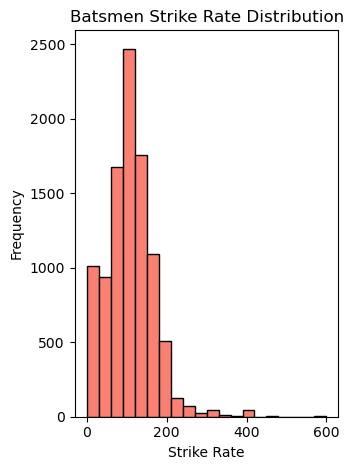

In [21]:
# Strike Rate Distribution Histogram
plt.subplot(1, 2, 2)
plt.hist(t20_data['batsman1_runs'] / t20_data['batsman1_balls'] * 100, bins=20, color='salmon', edgecolor='black')
plt.title('Batsmen Strike Rate Distribution')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
team_performance = t20_data.groupby('home_team').agg({'runs': 'sum', 'wicket_id': 'count'}).reset_index()
team_performance.rename(columns={'home_team': 'Team', 'runs': 'Total Runs', 'wicket_id': 'Matches Played'}, inplace=True)

In [24]:
team_performance['Average Runs per Match'] = team_performance['Total Runs'] / team_performance['Matches Played']

In [26]:
team_performance['Average Runs Conceded per Match'] = t20_data.groupby('away_team')['runs'].sum() / t20_data['away_team'].value_counts()

In [27]:
total_matches = t20_data['home_team'].value_counts() + t20_data['away_team'].value_counts()
team_performance['Win Percentage'] = (t20_data.groupby('home_team')['runs'].count() + t20_data.groupby('away_team')['runs'].count()) / total_matches * 100

In [30]:
plt.figure(figsize=(15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

Text(0.5, 1.0, 'Average Runs per Match')

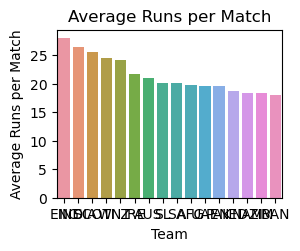

In [31]:
plt.subplot(2, 2, 1)
sns.barplot(x='Team', y='Average Runs per Match', data=team_performance.sort_values(by='Average Runs per Match', ascending=False))
plt.title('Average Runs per Match')